In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 37kB/s 
     |████████████████████████████████| 501kB 53.9MB/s 
     |████████████████████████████████| 4.3MB 44.4MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Dataset will be downloaded from ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip

In [0]:
img_width = 100
img_height = 100

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [0]:
train_datagen = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset', 
                                            target_size=(img_width, img_height),
                                            class_mode='binary',
                                            batch_size=16,
                                        subset = 'training',)

Found 22048 images belonging to 2 classes.


In [0]:
validation_datagen = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset', 
                                                 target_size=(img_width, img_height),
                                                 class_mode='binary',
                                                 batch_size=16,
                                                 subset = 'validation')

Found 5510 images belonging to 2 classes.


In [0]:
train_datagen.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### Build CNN  Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16928)            

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_datagen, 
                              steps_per_epoch=len(train_datagen),
                              epochs=5,
                              validation_data=validation_datagen,
                              validation_steps=len(validation_datagen),
                              verbose=1)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 295s 214ms/step - loss: 0.4277 - accuracy: 0.8055 - val_loss: 0.2145 - val_accuracy: 0.9309
Epoch 2/5
1378/1378 [==============================] - 297s 216ms/step - loss: 0.2195 - accuracy: 0.9287 - val_loss: 0.2065 - val_accuracy: 0.9327
Epoch 3/5
1378/1378 [==============================] - 313s 227ms/step - loss: 0.2036 - accuracy: 0.9329 - val_loss: 0.1941 - val_accuracy: 0.9336
Epoch 4/5
1378/1378 [==============================] - 298s 216ms/step - loss: 0.1886 - accuracy: 0.9407 - val_loss: 0.1888 - val_accuracy: 0.9374
Epoch 5/5
1378/1378 [==============================] - 291s 211ms/step - loss: 0.1760 - accuracy: 0.9428 - val_loss: 0.1902 - val_accuracy: 0.9392


In [0]:
history.history

{'accuracy': [0.8055152, 0.92870104, 0.9329191, 0.9406749, 0.9428066],
 'loss': [0.4277197639410572,
  0.2194894851544934,
  0.20359995932026304,
  0.18859623254010527,
  0.17599801150257383],
 'val_accuracy': [0.930853, 0.93266785, 0.93357533, 0.9373866, 0.9392015],
 'val_loss': [0.21447982479804667,
  0.2065466378370057,
  0.19410914157827694,
  0.1887607268611158,
  0.19022231850287188]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

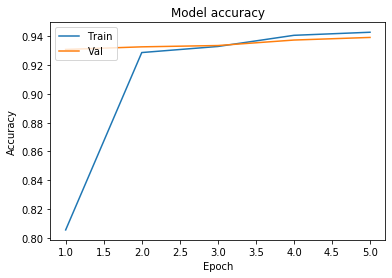

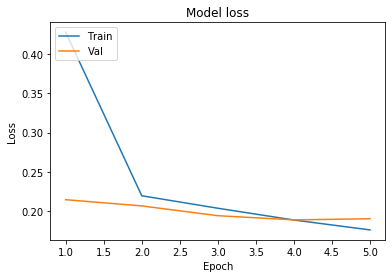

In [0]:
plot_learningCurve(history, 5)